# builelibの出力JSONからグラフを作成

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

## 計算結果を読み込む

In [2]:
js = open('builelib_data/builelib_result_AC.json', mode='r', encoding='utf-8')

In [3]:
dict = json.load(js)

In [4]:
# 室負荷の読み込み
room_load_c = np.array(dict['Qroom']['２F_事務室']['QroomDc'])
room_load_h = np.array(dict['Qroom']['２F_事務室']['QroomDh'])

# 外気負荷の読み込み
vent_load = np.array(dict['AHU']['EHP1-1']['qoaAHU'])

# 装置負荷の読み込み（省エネ基準では空調負荷）
ac_load_c = np.array(dict['AHU']['EHP1-1']['cooling']['Qahu'])
ac_load_h = np.array(dict['AHU']['EHP1-1']['heating']['Qahu'])

In [5]:
# pandaにデータを読み込ませる
date_index_daily = pd.date_range(datetime(1989, 1, 1), datetime(1989, 12, 31), freq='D')
dd = pd.DataFrame(index=date_index_daily)
dd['room_load_c'] = room_load_c
dd['room_load_h'] = room_load_h
dd['vent_load'] = vent_load
dd['ac_load_c'] = ac_load_c
dd['ac_load_h'] = ac_load_h

#### ac_load_c_c:室負荷が冷房で装置負荷が冷房
#### ac_load_c_h:室負荷が冷房で装置負荷が暖房
#### ac_load_h_c:室負荷が暖房で装置負荷が冷房
#### ac_load_h_h:室負荷が暖房で装置負荷が暖房

In [6]:
# 月集計[GJ]
date_index_monthly = pd.date_range(datetime(1989, 1, 1), datetime(1989, 12, 31), freq='M')
dm = pd.DataFrame(index=date_index_monthly)
dm['room_load_c'] = dd['room_load_c'].resample('M').sum()
dm['room_load_h'] = dd['room_load_h'].resample('M').sum()
dm['vent_load_c'] = (dd[dd['vent_load'] > 0.0])['vent_load'].resample('M').sum()
dm['vent_load_h'] = (dd[dd['vent_load'] < 0.0])['vent_load'].resample('M').sum()
dm['ac_load_c_c'] = (dd[dd['ac_load_c'] > 0.0])['ac_load_c'].resample('M').sum()
dm['ac_load_c_h'] = (dd[dd['ac_load_c'] < 0.0])['ac_load_c'].resample('M').sum()
dm['ac_load_h_c'] = (dd[dd['ac_load_h'] > 0.0])['ac_load_h'].resample('M').sum()
dm['ac_load_h_h'] = (dd[dd['ac_load_h'] < 0.0])['ac_load_h'].resample('M').sum()

## 日積算室負荷のグラフ作成

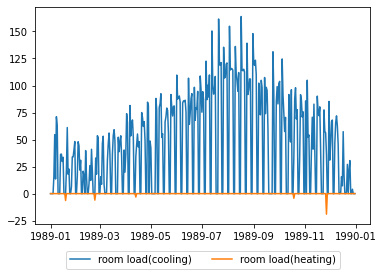

In [23]:
plt.plot(dd['room_load_c'], label='room load(cooling)')
plt.plot(dd['room_load_h'], label='room load(heating)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

## 日積算外気負荷のグラフ

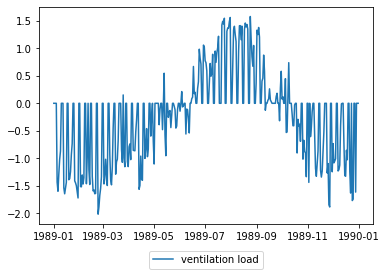

In [22]:
plt.plot(dd['vent_load'], label='ventilation load')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

## 日積算装置負荷のグラフ
##### cooling:室負荷が正（冷房要求）であるときの空調負荷（正であれば冷却コイル負荷、負であれば加熱コイル負荷）[MJ/day]
##### heating:室負荷が負（暖房要求）であるときの空調負荷（正であれば冷却コイル負荷、負であれば加熱コイル負荷） [MJ/day]

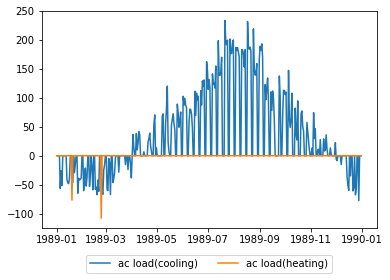

In [21]:
plt.plot(dd['ac_load_c'], label='ac load(cooling)')
plt.plot(dd['ac_load_h'], label='ac load(heating)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

## 月積算室負荷のグラフ

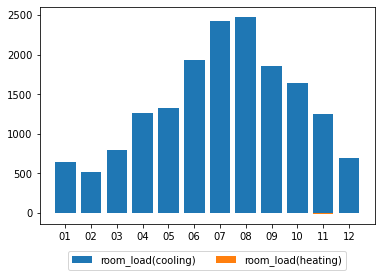

In [20]:
plt.bar(dm.index.strftime('%m'), dm['room_load_c'], label='room_load(cooling)')
plt.bar(dm.index.strftime('%m'), dm['room_load_h'], label='room_load(heating)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

## 月積算外気負荷のグラフ

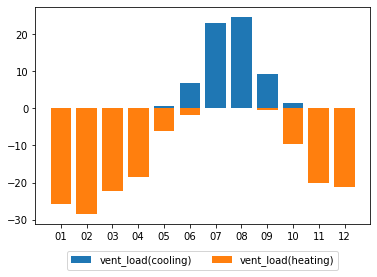

In [19]:
plt.bar(dm.index.strftime('%m'), dm['vent_load_c'], label='vent_load(cooling)')
plt.bar(dm.index.strftime('%m'), dm['vent_load_h'], label='vent_load(heating)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

In [13]:
print(dm)

            room_load_c  room_load_h  vent_load_c  vent_load_h  ac_load_c_c  \
1989-01-31   641.898481    -6.366922          NaN   -25.758459          NaN   
1989-02-28   519.693855    -6.020077          NaN   -28.547580          NaN   
1989-03-31   789.235253     0.000000     0.152293   -22.397093          NaN   
1989-04-30  1261.265345    -3.184187     0.000000   -18.392092   461.024891   
1989-05-31  1325.213886     0.000000     0.547237    -6.005797  1063.626730   
1989-06-30  1926.075366     0.000000     6.721641    -1.863697  2170.915765   
1989-07-31  2423.744333     0.000000    22.983430     0.000000  3582.109218   
1989-08-31  2479.788856     0.000000    24.734319     0.000000  3726.398558   
1989-09-30  1852.651032     0.000000     9.144899    -0.444001  2291.176288   
1989-10-31  1645.178483    -4.300032     1.495312    -9.578065  1265.137958   
1989-11-30  1244.980021   -19.013275          NaN   -20.229298   347.224508   
1989-12-31   687.232326     0.000000          NaN   

## 月積算装置負荷のグラフ

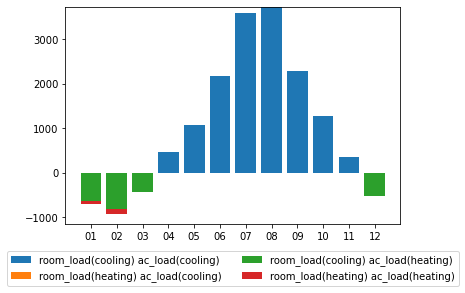

In [18]:
offsets = 0.0
plt.bar(dm.index.strftime('%m'), dm['ac_load_c_c'], bottom=offsets, label='room_load(cooling) ac_load(cooling)')
offsets += dm['ac_load_c_c']
plt.bar(dm.index.strftime('%m'), dm['ac_load_h_c'], bottom=offsets, label='room_load(heating) ac_load(cooling)')
offsets = 0.0
plt.bar(dm.index.strftime('%m'), dm['ac_load_c_h'], bottom=offsets, label='room_load(cooling) ac_load(heating)')
offsets += dm['ac_load_c_h']
plt.bar(dm.index.strftime('%m'), dm['ac_load_h_h'], bottom=offsets, label='room_load(heating) ac_load(heating)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()